In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

#1 Data importing 

In [2]:
df = pd.read_csv(r"C:\Users\Sahil\Downloads\smsspamcollection (1).tsv", sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.shape

(5572, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


Data cleaning

In [7]:
df1 = df.drop(columns=['length','punct'])

In [8]:
df1.sample(5)

,label,message
1001,ham,No..but heard abt tat..
1922,ham,No current and food here. I am alone also
4785,ham,Indeed and by the way it was either or - not b...
1353,ham,Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur S...
4621,ham,THIS IS A LONG FUCKIN SHOWR


One-Hot-Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=  LabelEncoder()
encoder .fit_transform(df1["label"])

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [10]:
df1['label'] = encoder.fit_transform(df1['label'])

In [11]:
df1

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df1.isnull().sum()

label      0
message    0
dtype: int64

In [12]:
df1.duplicated().sum()

np.int64(403)

In [13]:
df1=df1.drop_duplicates(keep='first')

In [14]:
df1.duplicated().sum()

np.int64(0)

In [15]:
df1.shape

(5169, 2)

EDA

In [16]:
df1['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

Eda

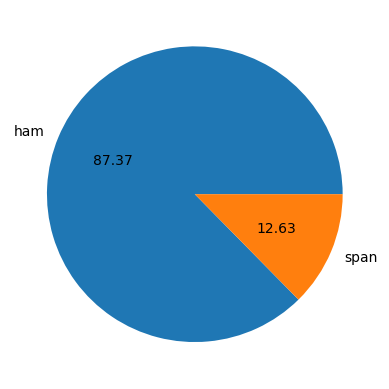

In [17]:
import matplotlib.pyplot as plt
plt.pie(df1['label'].value_counts(), labels=['ham' , 'span'] , autopct ='%0.2f')
plt.show()

In [18]:
import nltk

In [19]:
#nltk.download('punkt')    #below updated version

In [20]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
df1['message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: message, Length: 5169, dtype: int64

In [22]:
df1['num_chr'] = df1['message'].apply(len)

C:\Users\Sahil\AppData\Local\Temp\ipykernel_7704\3732687109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_chr'] = df1['message'].apply(len)


In [23]:
df1.head()

,label,message,num_chr
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df1['message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [25]:
df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: message, Length: 5169, dtype: int64

In [26]:
df1['num_words'] = df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Sahil\AppData\Local\Temp\ipykernel_7704\1184053677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_words'] = df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [27]:
df1.head()

,label,message,num_chr,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: message, Length: 5169, dtype: int64

In [29]:
df1['num_sentences'] = df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Sahil\AppData\Local\Temp\ipykernel_7704\1495297927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_sentences'] = df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [30]:
df1.head()

,label,message,num_chr,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df1[['num_words','num_chr' ,     'num_sentences' ]].describe()

,num_words,num_chr,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,18.593538,79.344941,1.974076
std,13.402779,58.439256,1.458967
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,61.000000,1.000000
75%,26.000000,119.000000,2.000000
max,220.000000,910.000000,38.000000


In [32]:
#ham
df1[df1['label']== 0][['num_words','num_chr' , 'num_sentences' ]].describe()

,num_words,num_chr,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,17.267715,70.906333,1.827724
std,13.588065,56.717234,1.394338
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,53.000000,1.000000
75%,22.000000,91.000000,2.000000
max,220.000000,910.000000,38.000000


In [33]:
#span
df1[df1['label']== 1][['num_words','num_chr' , 'num_sentences' ]].describe()

,num_words,num_chr,num_sentences
count,653.000000,653.000000,653.000000
mean,27.762634,137.704441,2.986217
std,6.993008,29.821348,1.494815
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,148.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,223.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_chr', ylabel='Count'>

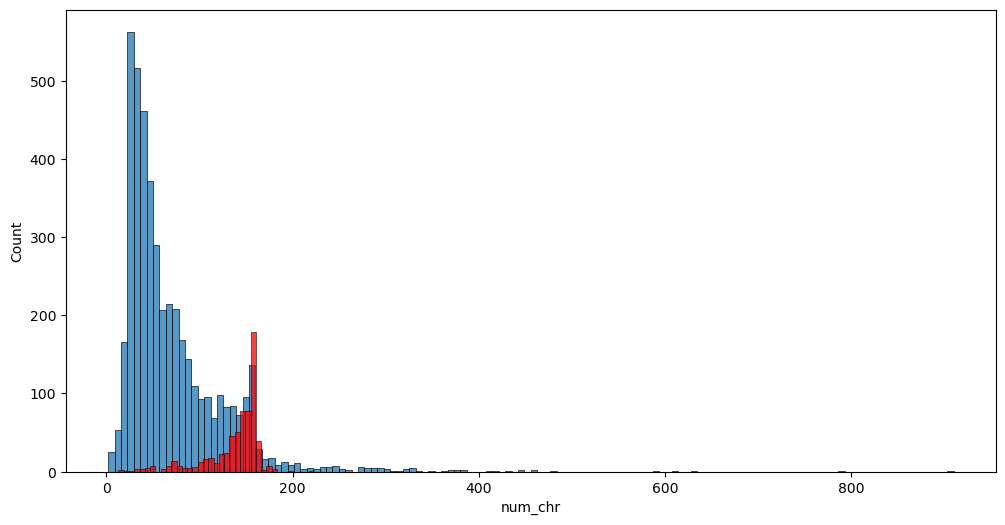

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_chr'])
sns.histplot(df1[df1['label']==1]['num_chr'] , color= 'r')

<Axes: xlabel='num_words', ylabel='Count'>

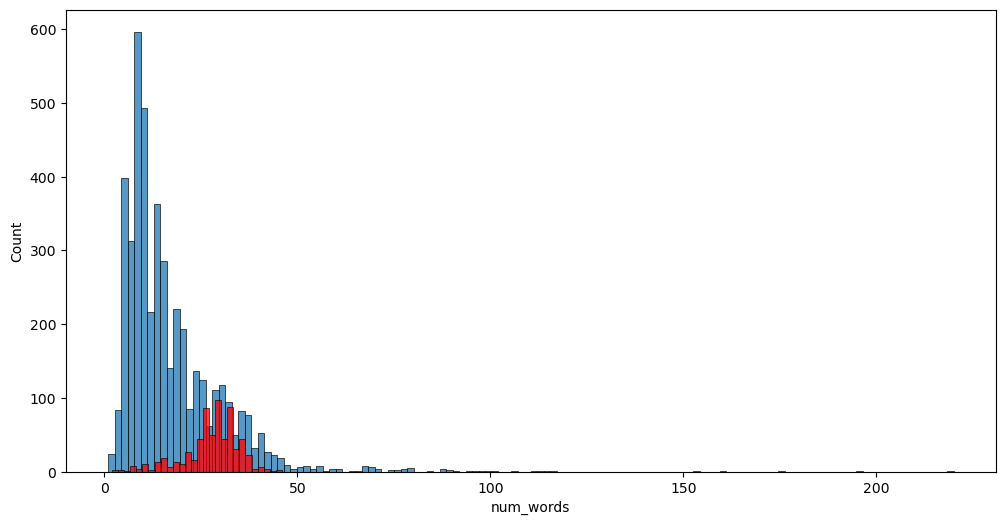

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_words'])
sns.histplot(df1[df1['label']==1]['num_words'] , color= 'r')

<Axes: xlabel='num_sentences', ylabel='Count'>

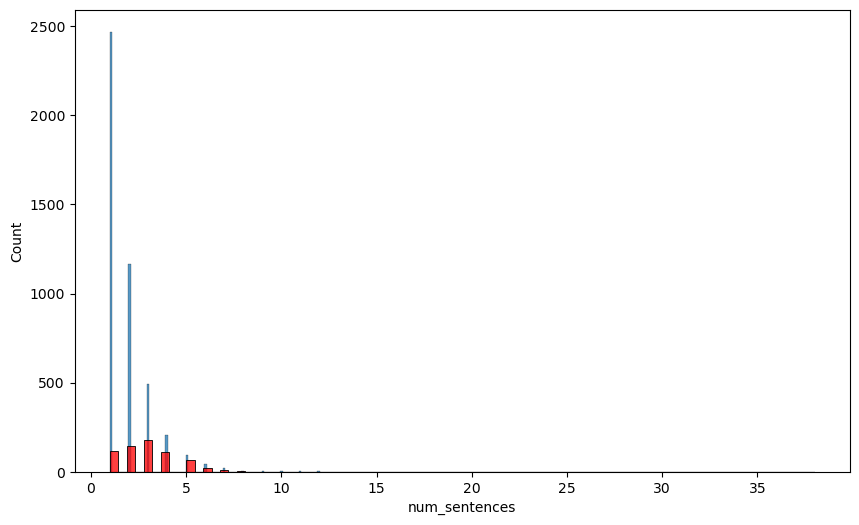

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df1[df1['label']==0]['num_sentences'])
sns.histplot(df1[df1['label']==1]['num_sentences'] , color= 'r')

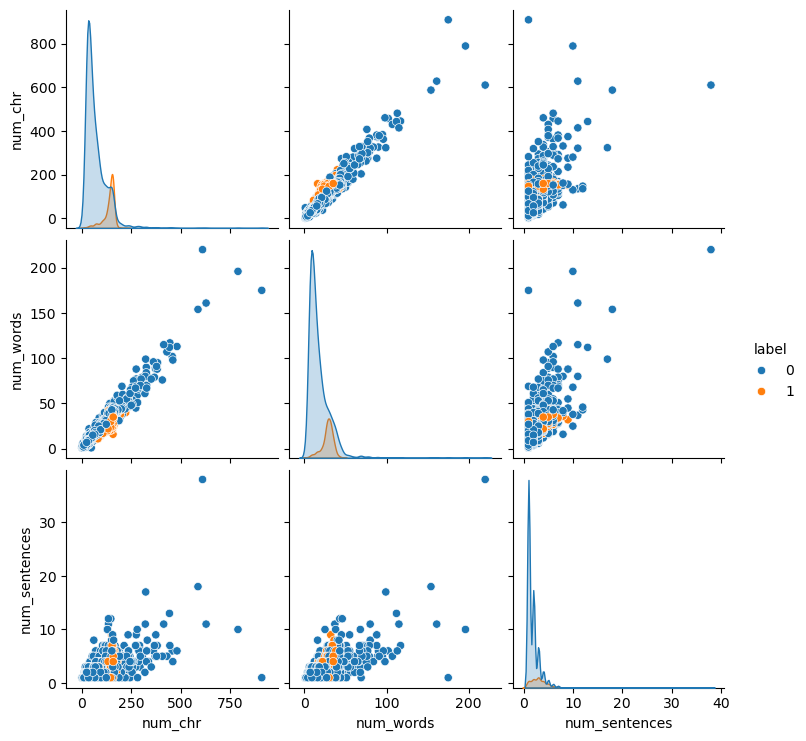

In [38]:
sns.pairplot(df1, hue='label')

In [39]:
df2 = df1.drop(columns=['message'])

In [40]:
df2.corr()

,label,num_chr,num_words,num_sentences
label,1.000000,0.379777,0.260168,0.263826
num_chr,0.379777,1.000000,0.966002,0.622566
num_words,0.260168,0.966002,1.000000,0.679142
num_sentences,0.263826,0.622566,0.679142,1.000000


<Axes: >

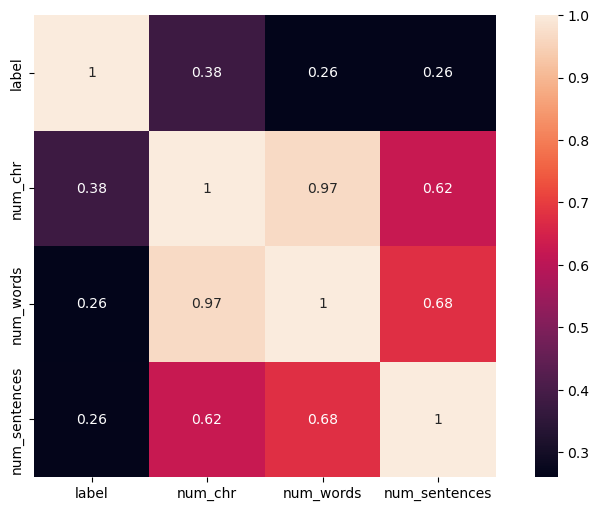

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr() , annot=True , square=True)

#Data preprocessing

In [42]:
from nltk.corpus import stopwords

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [47]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
      y.append(ps.stem(i))

  return " ".join(y)

In [49]:
df1['transformed_message']=df1['message'].apply(transform_text)

C:\Users\Sahil\AppData\Local\Temp\ipykernel_7704\2937467365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['transformed_message']=df1['message'].apply(transform_text)


In [50]:
from wordcloud import WordCloud

In [51]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [52]:
spam_wc=wc.generate(df1[df1['label']==0]['transformed_message'].str.cat(sep=" "))

In [53]:
from scipy.interpolate import generate_knots

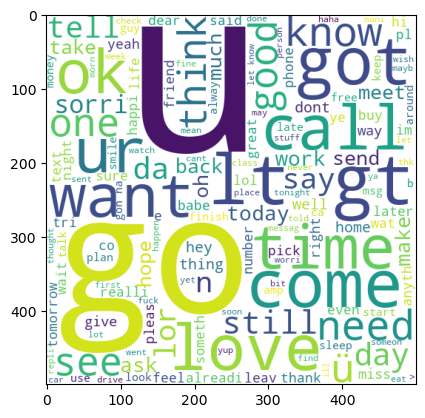

In [54]:
plt.imshow(spam_wc)

In [55]:
ham_wc =wc.generate(df1[df1['label']==0]['transformed_message'].str.cat(sep=" "))

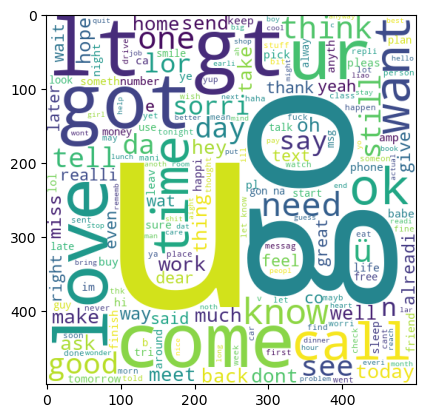

In [56]:
plt.imshow(ham_wc)

In [57]:
df1[df1['label']==1]['transformed_message'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [58]:
spam_corpus = []
for msg in df1[df1['label']==1]['transformed_message'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [59]:
len(spam_corpus)

9982

In [60]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 120,
         'ur': 119,
         'mobil': 114,
         'stop': 108,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 61,
         'urgent': 58,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'guarante': 43,
         'custom': 42,
         'messag': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'go': 33,
         'offer': 33,
         'line': 33,
         'want': 32,
         'receiv': 3

In [61]:
from collections import Counter
df3=pd.DataFrame(Counter(spam_corpus).most_common(30))
df3

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


In [62]:
df3 = df3.rename(columns={0:'word' , 1:"count"})

In [63]:
df3.head(1)

,word,count
0,call,320


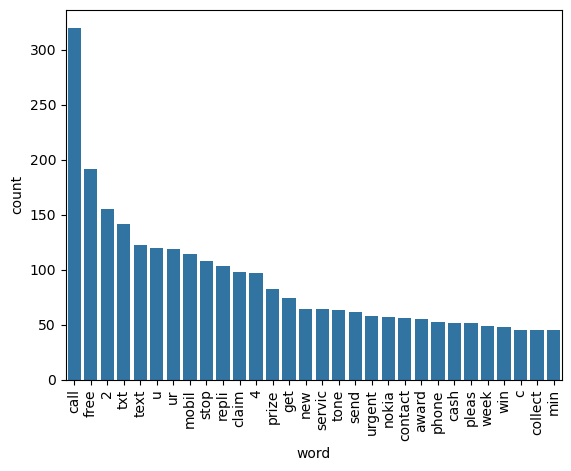

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="word",y="count",data=df3)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
ham_corpus = []
for msg in df1[df1['label']==0]['transformed_message'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [66]:
len(ham_corpus)

35939

In [67]:
from collections import Counter
Counter(ham_corpus)

Counter({'u': 897,
         'go': 407,
         'get': 351,
         '2': 288,
         'gt': 288,
         'lt': 287,
         'come': 278,
         'got': 239,
         'know': 237,
         'like': 236,
         'call': 235,
         'love': 222,
         'time': 220,
         'ok': 218,
         'good': 215,
         'want': 209,
         'ur': 203,
         'day': 195,
         'ü': 173,
         'need': 171,
         'one': 166,
         '4': 162,
         'lor': 159,
         'home': 152,
         'think': 150,
         'see': 148,
         'take': 144,
         'still': 144,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 124,
         'hope': 123,
         'dont': 123,
         'n': 121,
         'ask': 121,
         'sorri': 121,
         'send': 120,
         'r': 120,
         'work': 119,
         'hi': 116,
         'meet': 112,
         'oh': 111,
         'well': 110,
         'night': 110,
   

In [68]:
from collections import Counter
df4=pd.DataFrame(Counter(ham_corpus).most_common(30))
df4

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


In [69]:
df4 = df4.rename(columns={0:'word' , 1:"count"})

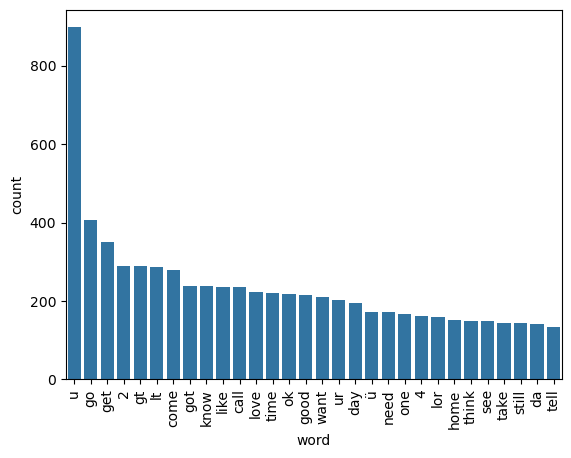

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="word",y="count",data=df4)
plt.xticks(rotation='vertical')
plt.show()

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [72]:
x= cv.fit_transform(df1['transformed_message']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 6782))

In [73]:
x.shape

(5169, 6782)

In [78]:
y = df1['label'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [81]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [89]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [90]:
gnb.fit(X_train,y_train)
y_predi=gnb.predict(X_test)
print(accuracy_score(y_test,y_predi))
print(confusion_matrix(y_test,y_predi))
print(precision_score(y_test,y_predi))

0.8694390715667312
[[794 114]
 [ 21 105]]
0.4794520547945205


In [94]:
mnb.fit(X_train,y_train)
y_predi=mnb.predict(X_test)
print(accuracy_score(y_test,y_predi))
print(confusion_matrix(y_test,y_predi))
print(precision_score(y_test,y_predi))

0.9680851063829787
[[891  17]
 [ 16 110]]
0.8661417322834646


In [93]:
bnb.fit(X_train,y_train)
y_predi=bnb.predict(X_test)
print(accuracy_score(y_test,y_predi))
print(confusion_matrix(y_test,y_predi))
print(precision_score(y_test,y_predi))

0.965183752417795
[[903   5]
 [ 31  95]]
0.95


Tf-idf

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [97]:
x = tf.fit_transform(df1['transformed_message']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 6782))

In [99]:
x.shape

(5169, 6782)

In [100]:
y = df1['label'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [103]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [104]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [105]:
gnb.fit(X_train,y_train)
y_predi=gnb.predict(X_test)
print(accuracy_score(y_test,y_predi))
print(confusion_matrix(y_test,y_predi))
print(precision_score(y_test,y_predi))

0.8684719535783365
[[794 114]
 [ 22 104]]
0.47706422018348627


In [106]:
mnb.fit(X_train,y_train)
y_predi=mnb.predict(X_test)
print(accuracy_score(y_test,y_predi))
print(confusion_matrix(y_test,y_predi))
print(precision_score(y_test,y_predi))

0.9593810444874274
[[908   0]
 [ 42  84]]
1.0


In [108]:
bnb.fit(X_train,y_train)
y_predi=bnb.predict(X_test)
print(accuracy_score(y_test,y_predi))
print(confusion_matrix(y_test,y_predi))
print(precision_score(y_test,y_predi))

0.965183752417795
[[903   5]
 [ 31  95]]
0.95
